#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

#### Question 1
- Delivery_time -> Predict delivery time using sorting time 

In [1]:
#Importing libraries 
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read file 
df=pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Peroforming EDA on the data

In [3]:
#Describing the data
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
#Getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
print("Dimensions",df.shape)
print("Name of the Comlumns",df.columns)

Dimensions (21, 2)
Name of the Comlumns Index(['Delivery Time', 'Sorting Time'], dtype='object')


In [6]:
# To check the null values of the data
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
# Renaming the column names
df=df.rename({'Delivery Time':'D_T','Sorting Time':'S_T'},axis=1)
df.head()

,D_T,S_T
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


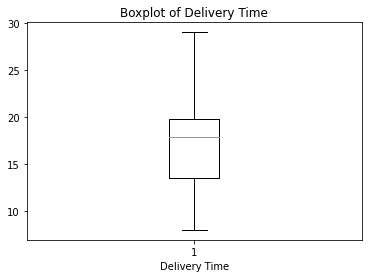

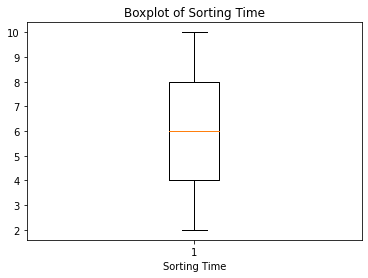

In [8]:
#Finding Outliers of both columns by boxplot
plt.boxplot(df['D_T'])
plt.xlabel('Delivery Time')
plt.title("Boxplot of Delivery Time")
plt.show()
plt.boxplot(df['S_T'])
plt.xlabel('Sorting Time')
plt.title("Boxplot of Sorting Time")
plt.show()

There are no outliers in the both columns based on the boxplot.

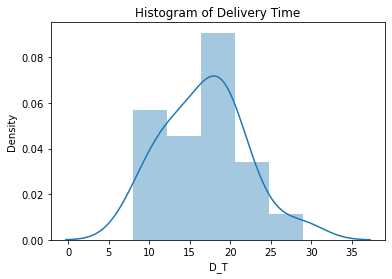

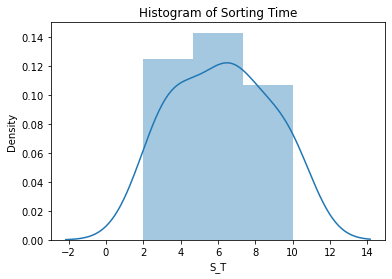

In [9]:
#Distribution Plots
sns.distplot(df['D_T'])
plt.title('Histogram of Delivery Time')
plt.show()
sns.distplot(df['S_T'])
plt.title('Histogram of Sorting Time')
plt.show()

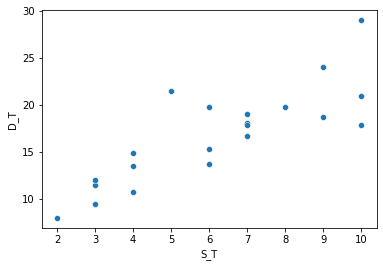

In [10]:
# Plotting Scatterplot to know the relation between variables
sns.scatterplot(df['S_T'],df['D_T'])
plt.show()

### Checking Co-relation between two variables (Columns)

In [11]:
# Finding corelation between two variables
df.corr()

,D_T,S_T
D_T,1.000000,0.825997
S_T,0.825997,1.000000


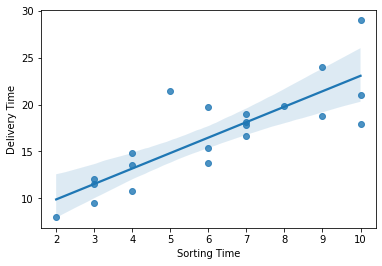

In [12]:
# Plotting Regression plot
sns.regplot(x=df['S_T'],y=df['D_T'])
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')
plt.show()

### Simple Linear regression Model
The equation would be,
delivery Time = B0 + B1(Sorting Time)

In [13]:
import statsmodels.formula.api as smf
model=smf.ols('D_T ~ S_T',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    D_T   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        23:58:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
S_T            1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Finding Residuals or Errors in the data model
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [15]:
# Predicting the target values 
Pred=model.predict(df.S_T)
Pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [16]:
# To find the total error or residual of the data model
RMSE=np.sqrt(np.mean((np.array(df.D_T)-np.array(Pred))**2))
RMSE

2.7916503270617654

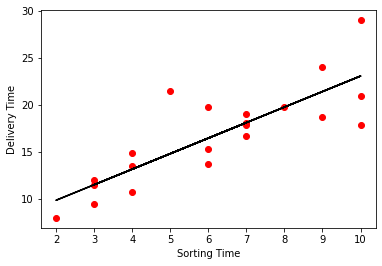

In [17]:
# Plotting the Actual Values and the Predicted Values
plt.scatter(df.S_T,df.D_T,color = 'red')
plt.plot(df.S_T,Pred,color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

### Applying Transformations to the data 
#### Applying Log Transformation
The equation would be,(Delivery Time) = B0 + B1 log(Sorting Time)

In [18]:
# Applying log transformation
model1=smf.ols('D_T ~ np.log(S_T)',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    D_T   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        23:58:55   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(S_T)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Predicting the target values 
Pred1=model1.predict(df.S_T)
Pred1
# To find the total error or residual of the data model
RMSE_log=np.sqrt(np.mean((np.array(df.D_T)-np.array(Pred1))**2))
RMSE_log

2.7331714766820663

#### Applying Square Root Transformation 
The equation would be,(Delivery Time) = B0 + B1 sqrt(Sorting Time)

In [20]:
# Applying square root transformation
model2=smf.ols('D_T ~ np.sqrt(S_T)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    D_T   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        23:58:55   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(S_T)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Predicting the target values 
Pred2=model2.predict(df.S_T)
Pred2
# To find the total error or residual of the data model
RMSE_sqrt=np.sqrt(np.mean((np.array(df.D_T)-np.array(Pred2))**2))
RMSE_sqrt

2.7315432100912105

#### Applying Cube Root Transformation 
The equation would be,(Delivery Time) = B0 + B1 cbrt(Sorting Time)

In [22]:
# Applying cube root transformation
model3=smf.ols('D_T ~ np.cbrt(S_T)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    D_T   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.48e-06
Time:                        23:58:55   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -11.5792      4.332     -2.673      0.015     -20.647      -2.511
np.cbrt(S_T)    15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Predicting the target values 
Pred3=model3.predict(df.S_T)
Pred3
# To find the total error or residual of the data model
RMSE_cbrt=np.sqrt(np.mean((np.array(df.D_T)-np.array(Pred3))**2))
RMSE_cbrt

2.724296018597873

#### Applying Exponential Transformation
The equation would be,

Delivery Time = exp(B0 + B1(Sorting Time))

log(Delivery Time) = B0 + B1(Sorting Time)

In [24]:
# Applying Exponential Transformation
model4=smf.ols('np.log(D_T) ~ S_T',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(D_T)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                        23:58:55   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
S_T            0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Predicting the target values 
Pred4=model4.predict(df.S_T)
Pred4
# To find the total error or residual of the data model
RMSE_exp=np.sqrt(np.mean((np.array(df.D_T)-np.array(np.exp(Pred4)))**2))
RMSE_exp

2.9402503230562007

#### Combination of Log and Quadratic Transformation

The equation would be,
log(Delivery Time) = B0 + B1(Sorting Time) + B2(Sorting Time)^2

In [26]:
# Adding Column of Sorting Time^2
df['ST_sq']=df.S_T**2
df.head()

,D_T,S_T,ST_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [27]:
# Applying log in quadratic equation
model5=smf.ols('np.log(D_T) ~ S_T + ST_sq ',data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(D_T)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.20e-06
Time:                        23:58:56   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
S_T            0.2659      0.080      3.315      0.004       0.097       0.434
ST_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Predicting the target values
Pred5=np.exp(model5.predict(df))
Pred5

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [29]:
# To find the total error or residual of the data model
RMSEQ=np.sqrt(np.mean((np.array(df.D_T)-np.array(Pred5))**2))
RMSEQ

2.799041988740927

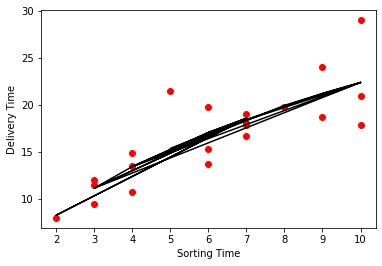

In [30]:
# Plotting the Actual Values and the Predicted Values
plt.scatter(df.S_T,df.D_T,color = 'red')
plt.plot(df.S_T,Pred3,color = 'black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

#### Model Validation

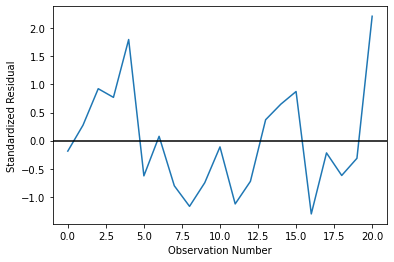

In [31]:
# Plotting the standardized residual w.r.t no. of observations
plt.plot(np.arange(len(df)),model5.resid_pearson)
plt.axhline(y=0,color='black')
plt.xlabel('Observation Number')
plt.ylabel('Standardized Residual')
plt.show()         

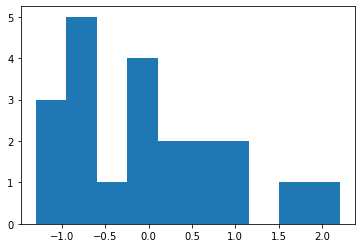

In [32]:
# PLotting Standardized Residual
plt.hist(model5.resid_pearson)
plt.show()

In [33]:
value ={"Model":pd.Series(["Linear","Log","Sqrt","Cbrt","Exp","Quad"]),
       "PRMSE_val":pd.Series([RMSE,RMSE_log,RMSE_sqrt,RMSE_cbrt,RMSE_exp,RMSEQ]),
       "Rsquare":pd.Series([model.rsquared,model1.rsquared,
                           model2.rsquared,model3.rsquared,
                           model4.rsquared,model5.rsquared])}
Table = pd.DataFrame(value)
Table

,Model,PRMSE_val,Rsquare
0,Linear,2.791650,0.682271
1,Log,2.733171,0.695443
2,Sqrt,2.731543,0.695806
3,Cbrt,2.724296,0.697418
4,Exp,2.940250,0.710948
5,Quad,2.799042,0.764867


Hence, the R-squared value is greater than 75%, we can take this model as the best fit model for the prediction of dependent variable using independent variable.

 The following is the data with actual and predicted values of the dependent variables.

In [34]:
# Adding Column of Sorting Time^2
df['Predicted DT']=Pred5
df[['D_T','Predicted DT']]

,D_T,Predicted DT
0,21.00,21.646921
1,13.50,12.909227
2,19.75,16.995933
3,24.00,21.176938
4,29.00,21.646921
5,15.35,16.995933
6,19.00,18.764526
7,9.50,10.825502
8,17.90,21.646921
9,18.75,21.176938


#### Question 2
- Salary_hike -> Build a prediction model for Salary_hike


In [35]:
#Importing libraries 
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [36]:
#Read file 
S=pd.read_csv("Salary_Data.csv")
S.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Performing EDA on the data

In [37]:
#Describing the data
S.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [38]:
#Getting info about the data
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
print("Dimensions",S.shape)
print("Name of the Comlumns",S.columns)

Dimensions (30, 2)
Name of the Comlumns Index(['YearsExperience', 'Salary'], dtype='object')


In [40]:
# To check the null values of the data
S.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [41]:
# Renaming the column names
S1=S.rename({'YearsExperience':'Exp','Salary':'Sal'},axis=1)
S1.head()

,Exp,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


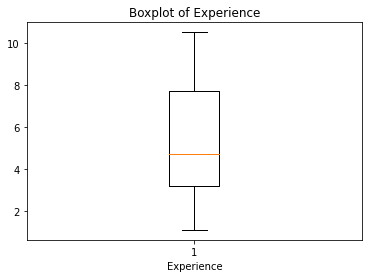

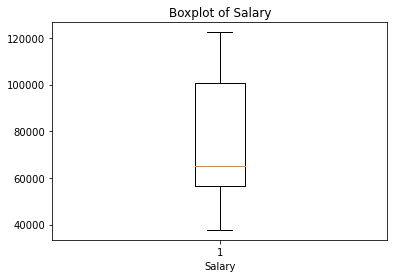

In [42]:
#Finding Outliers of both columns by boxplot
plt.boxplot(S1['Exp'])
plt.xlabel('Experience')
plt.title("Boxplot of Experience")
plt.show()
plt.boxplot(S1['Sal'])
plt.xlabel('Salary')
plt.title("Boxplot of Salary")
plt.show()

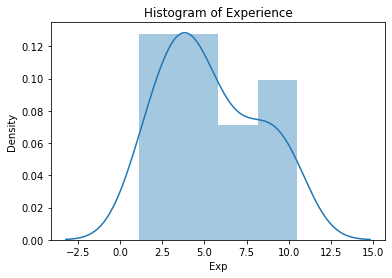

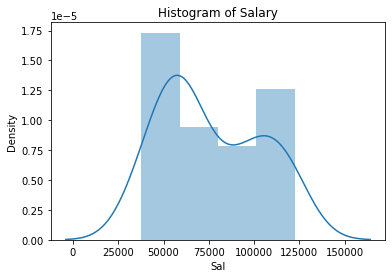

In [43]:
#Distribution Plots
sns.distplot(S1['Exp'])
plt.title('Histogram of Experience')
plt.show()
sns.distplot(S1['Sal'])
plt.title('Histogram of Salary')
plt.show()

In [44]:
# Finding corelation between two variables
S1.corr()

,Exp,Sal
Exp,1.000000,0.978242
Sal,0.978242,1.000000


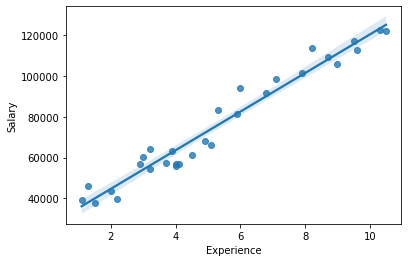

In [45]:
# Plotting Regression plot
sns.regplot(x=S1['Exp'],y=S1['Sal'])
plt.ylabel('Salary')
plt.xlabel('Experience')
plt.show()

### Simple Linear Regression Model

In [46]:
import statsmodels.formula.api as smf
Smodel=smf.ols('Sal ~ Exp',data=S1).fit()
Smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        23:58:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# R squared values 
Smodel.rsquared,model.rsquared_adj

(0.9569566641435086, 0.6655489208860244)

- Since the model has R-squared value more than 0.8 i.e., 0.95 we can say that this is the best model.

#### Prediction

In [48]:
# To predict the target value
predict = Smodel.predict(S1.Exp)
predict

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [49]:
# To find the total error or residual of the data model
rmse=np.sqrt(np.mean((np.array(S1.Sal)-np.array(predict))**2))
rmse

5592.043608760662

#### The following is the data with actual and predicted values of the dependent variable (Salary)

In [50]:
S['Predicted Salary'] = predict
S[['Salary','Predicted Salary']]

,Salary,Predicted Salary
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788
